In [2]:
import sys
sys.path.insert(0, "..")

from well_logs import Well

In [3]:
well = Well(path="/Users/akozhevin/data/dataset updated/417PO/", force_load_logs=True)

In [4]:
well.segments[0].logs.columns

Index(['IKVG1', 'IKVG2', 'IKVG3', 'IKVG4', 'IKVG5', 'MGZ', 'MPZ', 'ALPS', 'BK',
       'DENSITY', 'DT', 'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'IK',
       'IKVR1', 'IKVR2', 'IKVR3', 'IKVR4', 'IKVR5', 'KGGK', 'KPO', 'KW', 'MBK',
       'MLM', 'NKTD', 'NKTM', 'PZ', 'RP', 'SG', 'SP', 'SXWB', 'TT1', 'TT2',
       'VGL', 'C1', 'C2', 'DS', 'KGL', 'PRON', 'KPS', 'MCAL', 'RS', 'NKTR'],
      dtype='object')

In [5]:
well["GK", "BK", "GZ1", "IK", "NKTD", "SP"][2355:2376].plot()

In [6]:
core_data = well.segments[0].core_data
depth = core_data['Глубина кровли интервала'] + core_data['Место взятия от верха, м']
density = well.segments[0].logs['DENSITY']

(2770, 2800)

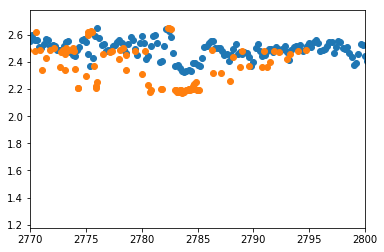

In [7]:
import matplotlib.pyplot as plt
plt.scatter(density.index, (density.values))
plt.scatter(depth, (core_data['Плотность (объемная)']))
plt.xlim((2770, 2800))